In [21]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('titanic.csv')
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.at[5, 'Age'] = 28

In [4]:
count = 0
for person in data["Age"]:
    if person > 18:
        count = count + 1
count

576

In [5]:
count = 0
for person in data["Sex"]:
    if person == "male":
        count = count + 1
    
count = (count / len(data)) * 100
count

64.75869809203144

In [6]:
first = 0
second = 0
third = 0
for person in data["Pclass"]:
    if person == 1:
        first += 1
    if person == 2:
        second += 1
    if person == 3:
        third += 1
        
print("First class:", first)
print("Second class:", second)
print("Third class:", third)

First class: 216
Second class: 184
Third class: 491


In [7]:
classes = {"Class":[], "Frequency":[]}
countFirst = 0
countSecond = 0
countThird = 0
for person in data["Pclass"]:
    if person == 1:
        countFirst += 1
    if person == 2:
        countSecond += 1
    if person == 3:
        countThird += 1
classes[]
    

SyntaxError: invalid syntax (808743299.py, line 12)

In [8]:
data[data['PassengerId'] == 528]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [9]:
idx = 0
for person in data["Name"]:
    if "Fannie" in person:
        break
    idx += 1
data.loc[idx]

PassengerId                              707
Survived                                   1
Pclass                                     2
Name           Kelly, Mrs. Florence "Fannie"
Sex                                   female
Age                                     45.0
SibSp                                      0
Parch                                      0
Ticket                                223596
Fare                                    13.5
Cabin                                    NaN
Embarked                                   S
Name: 706, dtype: object

In [10]:
maleCount = 0
femaleCount = 0


for idx in range(len(data)):
    if person == "male":
        maleCount += 1
    elif person == "female":
        femaleCount += 1

Rate = {
    'Sex': ['Male', 'Female'],
    'Survived': [maleCount, femaleCount]
}

df2 = pd.DataFrame(Rate)
df2.head()

,Sex,Survived
0,Male,0
1,Female,0


In [11]:
maleSurvived = 0
femaleSurvived = 0
maleDied = 0
femaleDied = 0

for idx in range(len(data)):
    if data.loc[idx]["Sex"] == "male" and data.loc[idx]["Survived"] == 0:
        maleDied += 1
    elif data.loc[idx]["Sex"] == "male" and data.loc[idx]["Survived"] == 1:
        maleSurvived += 1
    elif data.loc[idx]["Sex"] == "female" and data.loc[idx]["Survived"] == 0:
        femaleDied += 1
    elif data.loc[idx]["Sex"] == "female" and data.loc[idx]["Survived"] == 1:
        femaleSurvived += 1
        
conTable = pd.DataFrame({
    "Male": [maleDied, maleSurvived],
    "Female": [femaleDied, femaleSurvived]
})
conTable.index = ["Died", "Survived"]
conTable.head()

,Male,Female
Died,468,81
Survived,109,233


In [12]:
minAge = data["Age"].max()
print(minAge)

80.0


In [13]:
childSur = 0
childDie = 0
adultSur = 0 
adultDie = 0
EldSur = 0
EldDie= 0
childTotal = 0
adultTotal = 0
EldTotal = 0
All = 0
AllSur = 0
AllDie = 0
for idx in range(len(data)):
    if data.loc[idx]["Age"] < 18 and data.loc[idx]["Survived"] == 0:
        childDie += 1
        childTotal += 1
        All += 1
        AllDie += 1
    elif data.loc[idx]["Age"] < 18 and data.loc[idx]["Survived"] == 1:
        childSur += 1
        childTotal += 1
        All += 1
        AllSur += 1
    elif data.loc[idx]["Age"] >= 18 and data.loc[idx]["Age"] < 60 and data.loc[idx]["Survived"] == 0:
        adultDie += 1
        adultTotal += 1
        All += 1
        AllDie += 1
    elif data.loc[idx]["Age"] >= 18 and data.loc[idx]["Age"] < 60 and data.loc[idx]["Survived"] == 1:
        adultSur += 1
        adultTotal += 1
        All += 1
        AllSur += 1
    elif data.loc[idx]["Age"] >= 60 and data.loc[idx]["Survived"] == 0:
        EldDie += 1
        EldTotal += 1
        All += 1
        AllDie += 1
    elif data.loc[idx]["Age"] >= 60 and data.loc[idx]["Survived"] == 1:
        EldSur += 1
        EldTotal += 1
        All += 1
        AllSur += 1
        
conTable = {
    "Child":[childSur/childTotal *100, childDie/childTotal *100],
    "Adult":[adultSur/adultTotal *100, adultDie/adultTotal *100],
    "Elderly":[EldSur/EldTotal *100, EldDie/EldTotal *100],
    "Total":[AllSur/All *100, AllDie/All *100]
}
df2 = pd.DataFrame(conTable)
df2.index = ["Survived", "Died"]
df2.head()

,Child,Adult,Elderly,Total
Survived,53.982301,38.541667,26.923077,40.559441
Died,46.017699,61.458333,73.076923,59.440559


In [27]:
passClass = {"First": 0,"Second": 0,"Third": 0}
for passenger in data["Pclass"]:
    if passenger == 1:
        passClass["First"] += 1
    elif passenger == 2:
        passClass["Second"] += 1
    elif passenger == 3:
        passClass["Third"] += 1
        
    percentClasses = {"First": (passClass["First"]/len(data))*100,
                      "Second": (passClass["Second"]/len(data))*100,
                      "Third": (passClass["Third"]/len(data))*100
                     }
    freqTable = {
      "Classes": ["First","Second","Third"],
       "Percent": [passClass["First"], passClass["Second"], passClass["Third"]]
    }
    freqTable = pd.DataFrame(freqTable)
    freqTable.head()

<AxesSubplot:xlabel='Classes', ylabel='Percent'>

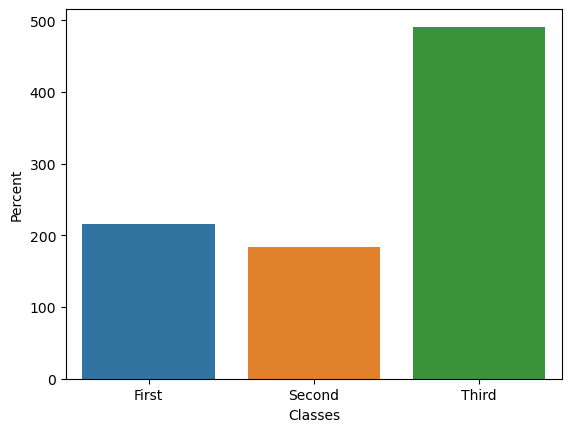

In [28]:
sns.barplot(data=freqTable, x="Classes", y="Percent")